In [2]:
import pandas as pd
import scipy
#1.（33%）导入pandas库，并使用相关方法进行数据集读取、基本信息处理和探索性分析等操作（各子任务请分别使用一行代码完成）。
file_name = r"C:\Users\86180\Desktop\数据集\data.csv"

df = pd.read_csv(file_name, encoding='utf-8')       #Q1

print(df.head(10))      # Q2使用head()方法展示前10行
  
df.info()       # Q3使用info()方法展示数据集基本信息

df = df.dropna()        #Q4 删除含有缺失值的行，并将结果保存到原变量df中  

df = df.reset_index(drop=True)      #Q5 重置索引，并将更新后的结果保存到原变量df中

df = df.drop(columns=['id'])    #Q6将数据集中的id列删除，并将更新后的结果保存到原变量df中
 
print(f"良性（B）的计数: {df['diagnosis'].value_counts().get('B', 0)},恶性（M）的计数: {df['diagnosis'].value_counts().get('M', 0)}")   #Q7

df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})     #Q8

print( df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean']].describe() )     #Q9

def coefficient_of_variation(series):  
    return series.std() / series.mean() * 100  
print(df.groupby('diagnosis').apply(lambda group: group.apply(coefficient_of_variation)) )      #Q10





         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

C:\Users\86180\AppData\Local\Temp\ipykernel_11232\1281192138.py:25: RuntimeWarning: invalid value encountered in scalar divide
  return series.std() / series.mean() * 100


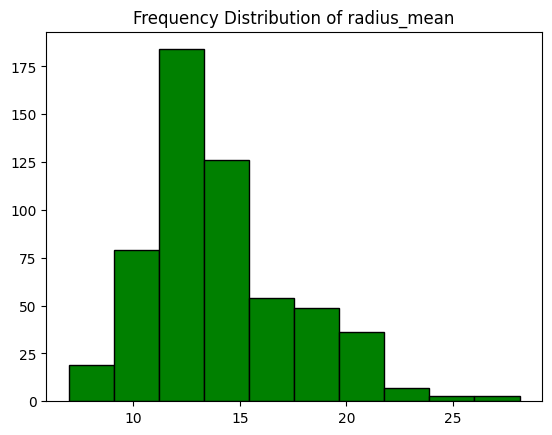

In [2]:
#2.（17%）导入numpy和matplotlib库，对数据集df进行一定数据可视化分析。
#Q1

import numpy   as   np
import matplotlib.pyplot as plt 
  
# 绘制频率分布直方图，设置条柱数为10，条柱填充色为绿色，条柱边框色为黑色  
plt.hist(df[ 'radius_mean' ] , bins=10, color='green', edgecolor='black')  
  
# 设置标题  
plt.title(f'Frequency Distribution of radius_mean')  
  
# 显示图形  
plt.show()

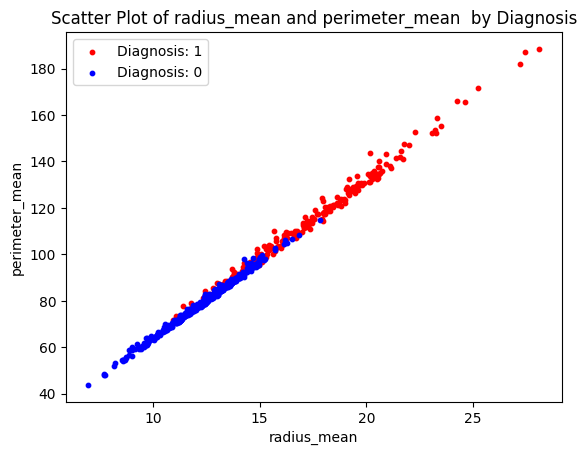

In [3]:
#Q2

plt.scatter(df[df['diagnosis'] == 1]['radius_mean'], df[df['diagnosis'] == 1]['perimeter_mean'],   
            color='red', label='Diagnosis: 1', s=10)  # 诊断为1的点标为红色  
plt.scatter(df[df['diagnosis'] == 0]['radius_mean'], df[df['diagnosis'] == 0]['perimeter_mean'],   
            color='blue', label='Diagnosis: 0', s=10)  # 诊断为0的点标为蓝色  

# 设置标题和图例  
plt.title('Scatter Plot of radius_mean and perimeter_mean  by Diagnosis')  
plt.xlabel('radius_mean')  
plt.ylabel('perimeter_mean')  
plt.legend()  
  
# 显示图形  
plt.show()

<Figure size 1000x800 with 0 Axes>

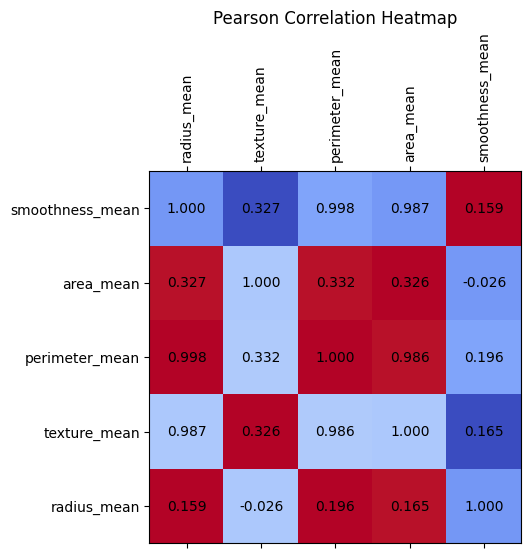

In [4]:
#Q3（7%）选取diagnosis及其它任意五个mean类型特征，求它们的Pearson相关系数矩阵，并绘制相应的相关系数热力矩阵图。
# 请为每个位置增添对应数值表示（保留三位小数），利用colorbar设置数值与颜色的对应关系条，并配上合适的标题和坐标表示。
selected_features = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean']

# 计算Pearson相关系数矩阵  
correlation_matrix = df[selected_features].corr(method='pearson')  

# 获取相关系数矩阵的值，并移除对角线上的值（通常是1，因为特征与自身的相关度总是最大的）  
correlation_values = correlation_matrix.values  
# 设置绘图属性  
plt.figure(figsize=(10, 8))  # 设置图形大小  
cax = plt.matshow(correlation_values, cmap='coolwarm')  # 绘制热力图 

# 设置x轴和y轴的标签  
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, rotation=90)  
plt.yticks(range(correlation_matrix.shape[0]), correlation_matrix.columns)  
  
# 添加标题  
plt.title('Pearson Correlation Heatmap')  
  
# 翻转y轴标签的顺序，使其与矩阵的行对齐  
plt.gca().yaxis.set_ticks_position('left')  
plt.gca().yaxis.tick_left()  
plt.gca().invert_yaxis()  
  
# 显示数值标签  
for (i, j), z in np.ndenumerate(correlation_matrix):  
    # 转换坐标，使得y轴从下到上  
    plt.text(j, correlation_matrix.shape[0] - 1 - i, '{:.3f}'.format(z), va='center', ha='center')  
  
# 显示图形  
plt.show()

In [15]:
#3.（18%）线性回归是一类经典的统计建模方法。
#Q1.（5%）利用二次多项式进行回归建模，求模型参数的最小二乘估计。
# 提取特征和目标变量  
X = df['radius_mean'].values  # 特征变量  
y = df['area_mean'].values  # 响应变量  

expanded_X= np.column_stack((np.ones(len(X)), X,X*X)) 

w = np.dot(np.dot(np.linalg.pinv(np.dot(expanded_X,expanded_X.T)),expanded_X).T,y.T) 

  
# 输出模型参数  
print("模型参数的最小二乘估计为：", w)     
  

模型参数的最小二乘估计为： [-4.72267699 -0.44070983  3.13966962]


In [14]:
#Q2.（3%）使用numpy.polyfit()方法做二次多项式拟合，求相应模型参数估计，比较与上一步所得估计的结果。

  
# 使用numpy.polyfit()进行二次多项式拟合  
# polyfit返回的系数是从最高次到最低次的顺序  
coefficients_polyfit = np.polyfit(X, y, 2)  
  
# 输出使用numpy.polyfit()得到的模型参数估计  
print("使用numpy.polyfit()得到的模型参数估计为：", coefficients_polyfit) 

# 由于numpy.polyfit()返回的是降序排列的系数，而最小二乘法返回的是按照方程顺序排列的系数  
# 我们需要调整numpy.polyfit()的系数顺序以便比较 
w0, w1, w2 = coefficients_polyfit  
coefficients_aligned = np.array([w2, w1, w0]) 
   
 #比较两个结果  
if np.allclose(coefficients_aligned, w):  
    print("两种方法得到的参数估计相同")  
else:  
    print("两种方法得到的参数估计存在差异")  

使用numpy.polyfit()得到的模型参数估计为： [ 3.14186228 -0.44260792 -4.70867951]
两种方法得到的参数估计存在差异


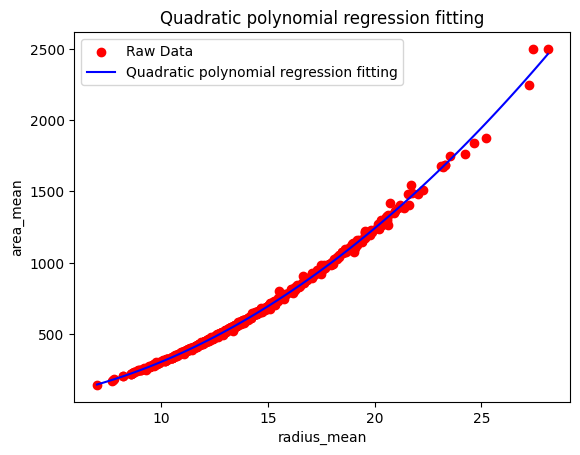

In [7]:
#Q3
# 接下来，使用matplotlib绘制原始数据点和拟合的二次多项式曲线  
# 生成用于绘图的X值范围  
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  
X_plot_poly = np.hstack([np.ones((X_plot.shape[0], 1)), X_plot, X_plot**2])  
  
# 使用模型参数计算拟合的y值  
y_plot_poly = X_plot_poly.dot(w)  

plt.scatter(X, y, color='red', label='Raw Data')  

# 绘制拟合的二次多项式曲线  
plt.plot(X_plot, y_plot_poly, color='blue', label='Quadratic polynomial regression fitting')  
  
# 添加图例和标题  
plt.legend()  
plt.title('Quadratic polynomial regression fitting')  
plt.xlabel('radius_mean')  
plt.ylabel('area_mean')  
  
# 显示图形  
plt.show()

Q4
考虑圆形区域的半径与面积的关系，A = πr^2,因此，从特征的含义上来看，我们预期area_mean与radius_mean之间应该存在一个二次关系，而不是线性的。

从散点图上来看，观察到数据点呈现明显的曲线分布（特别是当半径增加时，面积的增加速度越来越快），这进一步表明二者之间可能不是简单的线性关系。

综上所述，线性回归肯定不适用与这个场景

In [20]:
#4.（18%）数据降维，即选择性地削减数据集的属性维度，可以在牺牲一小部分信息的情况下大幅增加数据处理的效率。其中主成分分析是一种应用非常广泛的数据降维方法。
#Q1
  
# 提取特征并转换为numpy数组  
X = df[["perimeter_mean", "radius_mean"]].to_numpy()  


# 计算协方差矩阵  
corX = np.cov(X, rowvar=False)  
  
# 计算特征值和特征向量  
eigV, eigMat = np.linalg.eig(corX)  

# 对特征值进行排序，并相应地重新排序特征向量  
idx = eigV.argsort()[::-1]  
eigV_sorted = eigV[idx]  
eigMat_sorted = eigMat[:, idx]    #每个特征向量是一个列向量

# 输出结果以验证正交性 
identity_check = np.dot(eigMat.T, eigMat)
print("协方差矩阵 corX:")  
print(corX)  
print("\n排序后的特征值 eigV:")  
print(eigV_sorted)  
print("\n排序后的特征向量矩阵 eigMat:")  
print(eigMat_sorted)  
print("\n特征向量矩阵的正交性验证:")  
print(np.dot(eigMat.T, eigMat) )  
  
# 如果identity_check接近单位矩阵，则eigMat是正交的  
# 可以使用np.allclose()来检查是否与单位矩阵接近  
print('检查是否与单位矩阵接近',np.allclose(identity_check, np.eye(corX.shape[0])))

协方差矩阵 corX:
[[578.32210982  83.77072122]
 [ 83.77072122  12.18753099]]

排序后的特征值 eigV:
[5.90457503e+02 5.21373729e-02]

排序后的特征向量矩阵 eigMat:
[[ 0.98966947 -0.14336785]
 [ 0.14336785  0.98966947]]

特征向量矩阵的正交性验证:
[[ 1.00000000e+00 -6.44062151e-18]
 [-6.44062151e-18  1.00000000e+00]]
检查是否与单位矩阵接近 True


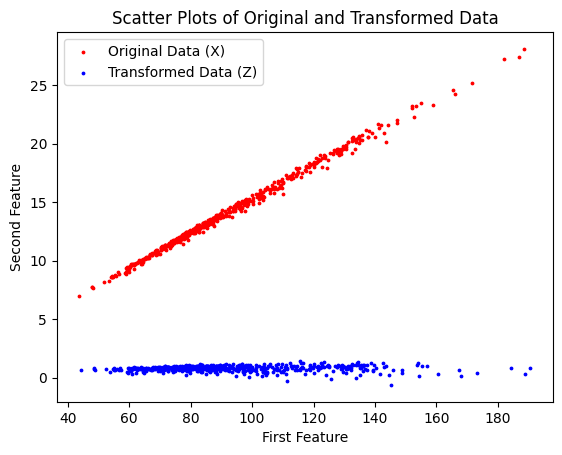

In [9]:
#Q2

# 计算X与eigMat的矩阵乘积  
Z = np.dot(X,eigMat_sorted)

# 绘制原始数据X的散点图（红色）  
plt.scatter(X[:, 0], X[:, 1], color='red', s=3, label='Original Data (X)')  
  
# 绘制转换后数据Z的散点图（蓝色）  
plt.scatter(Z[:, 0], Z[:, 1], color='blue', s=3, label='Transformed Data (Z)')  
  
# 设置图例、标题和坐标轴标签  
plt.legend()  
plt.title('Scatter Plots of Original and Transformed Data')  
plt.xlabel('First Feature')  
plt.ylabel('Second Feature')  
  
# 显示图形  
plt.show() 

In [19]:
#Q3
corZ = np.cov(Z, rowvar=False)  
  
# 打印Z的协方差矩阵  
print("协方差矩阵 corZ:")  
print(corZ)  
  
# 打印特征值 eigV  
print("\n特征值 eigV:")  
print(eigV)  
  
# 比较corZ的对角线元素与eigV（排序后），它们应该是相同的  

# 比较对角线上的元素  
diagonal_corZ = np.diag(corZ)  
print("\ncorZ的对角线元素 diagonal_corZ:")  
print(diagonal_corZ)  
  
# 检查对角线元素与排序后的特征值是否接近  
print('检查对角线元素与排序后的特征值是否接近:',np.allclose(diagonal_corZ, eigV ))  
  
# 基于以上分析，我们选择保留方差最大的主成分（即对角线上最大的元素对应的成分）  
# 因此，我们将删除Z的第二维数据以完成降维  
Z_reduced = Z[:, :1]  # 只保留第一列(特征值大的对应的那个特征向量)，即第一个主成分  
  

协方差矩阵 corZ:
[[ 5.90457503e+02 -4.51429790e-14]
 [-4.51429790e-14  5.21373729e-02]]

特征值 eigV:
[5.90457503e+02 5.21373729e-02]

corZ的对角线元素 diagonal_corZ:
[5.90457503e+02 5.21373729e-02]
检查对角线元素与排序后的特征值是否接近: True


5.（14%）假设检验是数理统计学中根据一定假设条件由样本推断总体性质的方法，在统计推断中的地位举足轻重，其中t检验是一类非常重要的假设检验方法。
#Q1
成组检验（独立样本t检验）适用于两个独立样本之间的比较，即两个样本来自于两个独立的总体，并且没有配对关系。每个样本中的观察值是相互独立的，并且两组样本的大小可以相同也可以不同。

成对检验（配对样本t检验）则适用于同一组个体在不同条件或时间下的测量值的比较。在这种情况下，每个观察值都与另一个观察值配对，例如，同一个个体在接受治疗前后的测量值。

我们假设diagnose的值用于将concavity_worst特征数据分成两组（例如，良性和恶性）。在这种情况下，两组数据是独立的，没有配对关系。因此，我们应该使用成组检验（独立样本t检验）来比较这两组样本间的均值差异。



In [25]:
from scipy import stats
#Q2

# 根据diagnose的值分组  
group1 = df[df['diagnosis'] == 0]['concavity_worst']  
group2 = df[df['diagnosis'] == 1]['concavity_worst']  

# 计算平均值  
mean_group1 = np.mean(group1)  
mean_group2 = np.mean(group2)  
  
print(f"第一组数据的平均值: {mean_group1}")  
print(f"第二组数据的平均值: {mean_group2}")

#原假设：H0: μ1 ≤ μ2
#其中，μ1和μ2分别是第一组和第二组数据的总体均值。这个原假设表示第一组数据的均值不大于第二组数据的均值。

# 进行独立样本t检验  
t_statistic, p_value = stats.ttest_ind(group1, group2,equal_var=False,alternative='greater')  
  
# 输出结果  
print(f"t统计量: {t_statistic}")  
print(f"p值: {p_value}")  
  
# 根据p值进行假设检验的推断  
alpha = 0.05  # 显著性水平  
if p_value < alpha:  
    print("拒绝原假设，认为第一组数据的均值显著大于第二组数据的均值。")  
else:  
    print("接受原假设，没有足够的证据认为第一组数据的均值显著大于第二组数据的均值。")

#Q4
#结论，可以认为正常人的concavity_worst特征数据比乳腺癌患者的小


第一组数据的平均值: 0.1663615971830986
第二组数据的平均值: 0.44671356097560977
t统计量: -19.01722049062515
p值: 1.0
接受原假设，没有足够的证据认为第一组数据的均值显著大于第二组数据的均值。
